# Шта чини еколошки отисак?
У претходним лекцијама смо објаснили значење термина еколошки отисак, као и неке показатеље на основу којих можемо да заклјучимо које државе троше више ресурса него што имају на распологању. У ствари, тачнија формулација би била "него што их имамо на располагању" јер сви трошимо заједничке, укупне капацитете планете Земље. Сада ћемо се мало детаљније позабавити структуром еколошког отиска. Sама чињеница да смо често користили термин "укупни", говори нам да је еколошки отисак заправо збир више елемената који се односе на потребе становника за различитим врстама ресурса.
<BR><BR>
За почетак ћемо учитати скуп података (онај који смо уредили у првој лекцији), али ћемо ограничити основних информација ограничити само на варијабле које у свом називу имају термин *footprint*.   

In [1]:
import pandas as pd

otisak = pd.read_csv('podaci/NFA 2021 v2.csv')
ftKol = [kol for kol in otisak.columns if 'Footprint' in kol] # Правимо низ колона које имају 'Footrpint' у називу
otisak[ftKol].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Cropland Footprint          158 non-null    float64
 1   Grazing Footprint           158 non-null    float64
 2   Forest Footprint            158 non-null    float64
 3   Carbon Footprint            158 non-null    float64
 4   Fish Footprint              158 non-null    float64
 5   Total Ecological Footprint  184 non-null    float64
dtypes: float64(6)
memory usage: 8.8 KB


На основу листе варијабли може се закључити да укупни еколошки отисак заправо чини пет компонената. Оне се тичу потреба за различитим природним ресурсима, како оним за производњу хране, тако и за апсорпцију штетних материја које човек производи. Пет компонената еколошког отиска односе се на утицај који човек, односно нека заједница или држава, имају на плодна земљишта (енгл. *cropland*), пашњаке (енгл. *grazing*), оранице (енгл. *cropland*), шуме (енгл. *forest*), емисију гасова стаклене баште (енгл. *carbon*) и рибљи потенцијал (енгл. *fish*). У медијима се најчешће указује на важност *карбонског отиска*, али очигледно је да емисија штетних гасова представља само једну компоненту укупног еколошког отиска.
<BR><BR>
Приказаћемо дистрибуције појединачних компоненти на засебним графиконима, а затим и све заједно на истом графикону уз вредности укупног еколошког отиска.

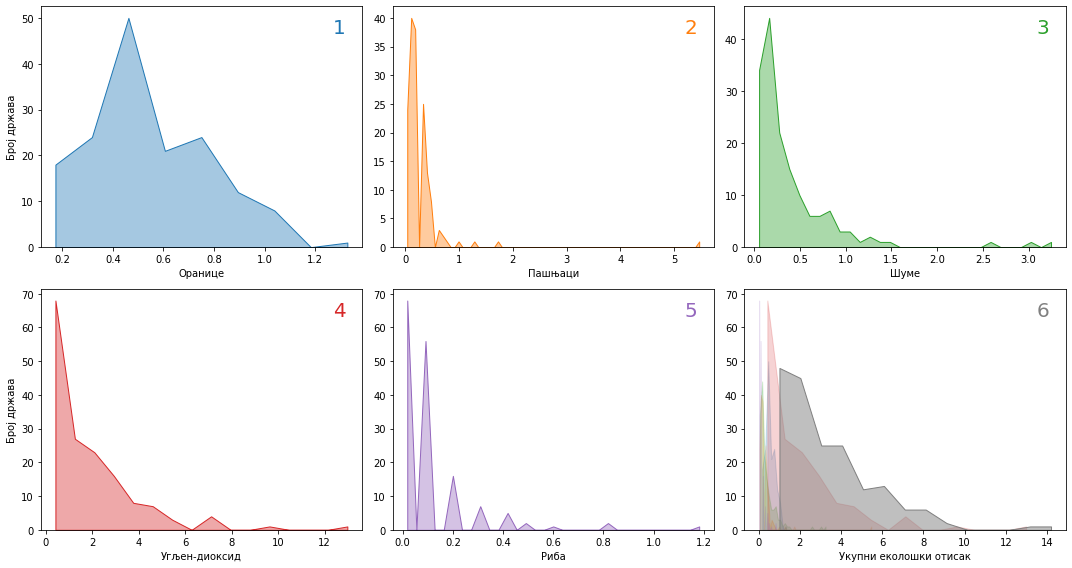

In [2]:
import matplotlib.pyplot as plt
import seaborn as sbrn

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,8))
boje = plt.get_cmap('tab10')
naziviX = ['Оранице', 'Пашњаци', 'Шуме', 'Угљен-диоксид', 'Риба', 'Укупни еколошки отисак']
naziviY = ['Број држава', '', '', 'Број држава', '', ''] # Само први графикони у сваком реду имају назив y-осе

for rb, ax in enumerate(fig.axes[:-1]):
    sbrn.histplot(otisak[ftKol], x=ftKol[rb], alpha=0.4, element='poly', ax=ax, color=boje(rb))
    
    boja = list(boje(rb))   # Овде се играмо и мењамо провидност (alpha) ниво тренутне боје у низу boje(rb)
    boja[3] = 0.2           # Боје се изражвају као tuple објекат са четири елемента (RGBA):
    bordura = tuple(boja)   # R - црвена, G - зелена, B - плава, A - провидност
    
    sbrn.histplot(otisak[ftKol], x=ftKol[rb], alpha=0.2, element='poly', ax=ax6, color=boje(rb), edgecolor=bordura) 
    ax.set_xlabel(naziviX[rb])
    ax.set_ylabel(naziviY[rb])
    ax.text(0.95, 0.95, rb+1, transform=ax.transAxes, fontsize=20, color=boje(rb), ha='right', va='top')

sbrn.histplot(otisak[ftKol], x=ftKol[5], alpha=0.5, element='poly', ax=ax6, color='gray')
ax6.text(0.95, 0.95, '6', transform=ax6.transAxes, fontsize=20, color='gray', ha='right', va='top')
ax6.set_xlabel('Укупни еколошки отисак')
ax6.set_ylabel('')
plt.tight_layout() # Овим мало сабијамо простор између графикона

За почетак обратите пажњу да вредности на x- и y-осама графикона нису једнаке. Због тога апсолутно поређење графикона није потпуно оправдано. На пример, можда вам делује да трећи и четврти графикон имају сличне распоне и дистрибуције, али након увида у вредности x-оса види се да је распон карбонског отиска чак четири пута већи. Исто важи и за поређење вредности на y-осама. Релативни однос дистрибуција и њихово поређење оправдано је само на шестом графикону, али на њему је много теже уочити распоне појединачних компоненти због великих разллика у распонима. На основу изгледа дистрибуција на шестом графикону можемо да закључимо и да је карбонски отисак кључна компонента укупног еколошког отиска. Такође уочавамо да су све дистирбуције, мање или више, позитивно искошене. То нам указује да је већина земаља груписана у зонама ниског отиска, а да релативно мали број држава веома одудара од типичних вредности. Ova aberantnost je najuočljivija na drugom, trećem i petom grafikonu. Наравно, треба напоменути да високе вредности отиска не значе нужно да је држава у еколошком дефициту, јер су то можда државе које имају и велики природни потенцијал.

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>Pokušajte samostalno da odaberete po pet država koje imaju najveće vrednosti na svakoj varijabli. Preporučujemo da upotrebite funkcije <b>sort_values()</b>, <b>head()</b> i <b>concat()</b> и да потражите њихове описе на интернету. Ако се не снађете, искористите код из датотеке <a href='podaci/ekotop5.txt' target='_blank'>ekotop5.txt</a>.</div> 

In [3]:
oranice = otisak.sort_values('Cropland Footprint', ascending = False)[['Country', 'Cropland Footprint']].head(5).reset_index(drop=True)
pasnjaci = otisak.sort_values('Grazing Footprint', ascending = False)[['Country', 'Grazing Footprint']].head(5).reset_index(drop=True)
sume = otisak.sort_values('Forest Footprint', ascending = False)[['Country', 'Forest Footprint']].head(5).reset_index(drop=True)
co2 = otisak.sort_values('Carbon Footprint', ascending = False)[['Country', 'Carbon Footprint']].head(5).reset_index(drop=True)
riba = otisak.sort_values('Fish Footprint', ascending = False)[['Country', 'Fish Footprint']].head(5).reset_index(drop=True)
ukupno = otisak.sort_values('Total Ecological Footprint', ascending = False)[['Country', 'Total Ecological Footprint']].head(5).reset_index(drop=True)
tabTop5 = pd.concat([oranice, pasnjaci, sume, co2, riba, ukupno], axis=1)
tabTop5.set_axis(['Држава', 'Оранице', 'Држава', 'Пашњаци', 'Држава', 'Шуме', 'Држава', 'CO2', 'Држава', 'Риба', 'Држава', 'Укупно'], axis=1, inplace=True)
tabTop5

,Држава,Оранице,Држава,Пашњаци,Држава,Шуме,Држава,CO2,Држава,Риба,Држава,Укупно
0,Australia,1.4,Mongolia,5.5,Estonia,3.3,Qatar,13.4,Norway,1.2,Qatar,14.7
1,Lithuania,1.1,Bolivia,1.7,Latvia,3.0,Luxembourg,9.7,Papua New Guinea,0.8,Luxembourg,12.8
2,Kazakhstan,1.1,Mauritania,1.3,Bhutan,2.6,Bahrain,7.5,Denmark,0.8,United Arab Emirates,8.9
3,Denmark,1.1,Chad,1.0,Sweden,1.5,Trinidad and Tobago,7.3,Fiji,0.6,Bahrain,8.7
4,Djibouti,1.1,Paraguay,0.8,Luxembourg,1.4,United Arab Emirates,6.9,Oman,0.5,Trinidad and Tobago,8.2
